In [33]:
%matplotlib inline
%load_ext autoreload
%autoreload

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter, defaultdict, deque
import itertools as it
from utils import Labeler
import statsmodels
from scipy import stats

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
%run preprocess.ipynb

EXP2_N_PARTICIPANT = 112
EXP2_N_UNFINISHED = 9
EXP2_N_CAUGHT = 6
EXP2_N_REMAIN = 97


preprocess.ipynb:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  "outputs": [],


EXP2_N_RT_CLIP = 100
EXP2_THRESHOLD_RT_CLIP = 9.031841356928114
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Stats

In [28]:
rdf = prep_for_r(cdf)

In [29]:
%%R -i rdf -o aov
df = rdf
df$feedback <- as.factor(df$feedback)
df$good_cue <- as.factor(df$good_cue)
full = glm(correct ~ feedback * good_cue, data=df, family='binomial')
aov = Anova(full, type=3)
aov

Analysis of Deviance Table (Type III tests)

Response: correct
                  LR Chisq Df Pr(>Chisq)
feedback           0.55622  1     0.4558
good_cue           1.14266  1     0.2851
feedback:good_cue  0.07833  1     0.7796


In [30]:
aov_tbl = get_rtable(aov, p_col='pr_chisq')
tex_chi2 = r"$\chi^2({df:.0f})={lr_chisq:.3f},\ {signif}$"
name = 'CRIT_ANOVA_{idx}'
save_analysis(aov_tbl, name, tex_chi2, display_tex=True)

EXP2_CRIT_ANOVA_FEEDBACK = $\chi^2(1)=0.556,\ p = 0.46$


<IPython.core.display.Latex object>

EXP2_CRIT_ANOVA_GOOD_CUE = $\chi^2(1)=1.143,\ p = 0.29$


<IPython.core.display.Latex object>

EXP2_CRIT_ANOVA_FEEDBACK_GOOD_CUE = $\chi^2(1)=0.078,\ p = 0.78$


<IPython.core.display.Latex object>

In [14]:
%%R -o comps

#gc <- pairs(lsmeans(full, ~ good_cue))
#f <- pairs(lsmeans(full, ~ feedback))
#results = summary(rbind(gc, f))
fgc <- pairs(lsmeans(full, ~ good_cue | feedback))
comps = summary(rbind(fgc))
comps

 feedback contrast  estimate        SE df z.ratio p.value
 0        0 - 1    -0.148027 0.2057516 NA  -0.719  0.7211
 1        0 - 1    -0.391305 0.2036124 NA  -1.922  0.1063

Results are given on the log odds ratio (not the response) scale. 
P value adjustment: mvt method for 2 tests 


In [15]:
comps_tbl = get_rtable(comps, p_col='p_value')
comps_tbl.feedback = comps_tbl.feedback.replace({'0': 'nofb', '1': 'fb'})
tex_ztest = r"$\mathrm{{LLR}} = {estimate:.2f} \pm {se:.2f},\ z={z_ratio:.2f},\ {signif}$"
name = 'CRIT_{feedback}_ZTEST'
save_analysis(comps_tbl, name, tex_ztest, display_tex=False)
savevars()

EXP3_CRIT_NOFB_ZTEST = $\mathrm{LLR} = -0.15 \pm 0.21,\ z=-0.72,\ p = 0.72$
EXP3_CRIT_FB_ZTEST = $\mathrm{LLR} = -0.39 \pm 0.20,\ z=-1.92,\ p = 0.11$


## Interaction with cue quiz


In [16]:
perfect = list(final_qdf.query('perfect').pid)
pcdf = cdf.query('pid == @perfect')
rdf = prep_for_r(pcdf)

In [17]:
%%R -i rdf -o aov
df = rdf
df$feedback <- as.factor(df$feedback)
# df$pass_quiz <- as.factor(df$pass_quiz)
df$good_cue <- as.factor(df$good_cue)
full = glm(correct ~ feedback * good_cue, data=df, family='binomial')
aov = Anova(full, type=3)
aov

Analysis of Deviance Table (Type III tests)

Response: correct
                  LR Chisq Df Pr(>Chisq)
feedback           0.29843  1     0.5849
good_cue           0.45761  1     0.4987
feedback:good_cue  1.14856  1     0.2839


In [18]:
aov_tbl = get_rtable(aov, p_col='pr_chisq')
tex_chi2 = r"$\chi^2({df:.0f})={lr_chisq:.3f},\ {signif}$"
name = 'CRIT_PASS_ANOVA_{idx}'
save_analysis(aov_tbl, name, tex_chi2, display_tex=False)

EXP3_CRIT_PASS_ANOVA_FEEDBACK = $\chi^2(1)=0.298,\ p = 0.58$
EXP3_CRIT_PASS_ANOVA_GOOD_CUE = $\chi^2(1)=0.458,\ p = 0.50$
EXP3_CRIT_PASS_ANOVA_FEEDBACK_GOOD_CUE = $\chi^2(1)=1.149,\ p = 0.28$


In [19]:
%%R -o comps

#gc <- pairs(lsmeans(full, ~ good_cue))
#f <- pairs(lsmeans(full, ~ feedback))
#results = summary(rbind(gc, f))
fgc <- pairs(lsmeans(full, ~ good_cue | feedback))
comps = summary(rbind(fgc))
comps

 feedback contrast   estimate        SE df z.ratio p.value
 0        0 - 1    -0.3053816 0.4521253 NA  -0.675  0.7494
 1        0 - 1    -0.9234082 0.3576638 NA  -2.582  0.0196

Results are given on the log odds ratio (not the response) scale. 
P value adjustment: mvt method for 2 tests 


In [20]:
comps_tbl = get_rtable(comps, p_col='p_value')
comps_tbl.feedback = comps_tbl.feedback.replace({'0': 'nofb', '1': 'fb'})
tex_ztest = r"$\mathrm{{LLR}} = {estimate:.2f} \pm {se:.2f},\ z={z_ratio:.2f},\ {signif}$"
name = 'CRIT_PASS_{feedback}_ZTEST'
save_analysis(comps_tbl, name, tex_ztest, display_tex=False)
savevars()

EXP3_CRIT_PASS_NOFB_ZTEST = $\mathrm{LLR} = -0.31 \pm 0.45,\ z=-0.68,\ p = 0.75$
EXP3_CRIT_PASS_FB_ZTEST = $\mathrm{LLR} = -0.92 \pm 0.36,\ z=-2.58,\ p < 0.05$


# Plot

../paper/figs/3/critical_correct.pdf


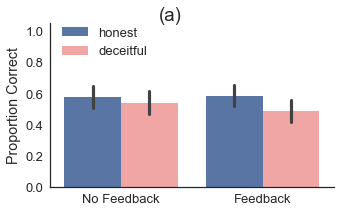

In [22]:
@plot(val='correct')
def plot_critical(df=cdf, val=None):
    df['feedback'] = df.feedback_cond
    # df['cue type'] = df.good_cue.apply(lambda x: 'accurate' if x else 'bogus')
    g = sns.factorplot('feedback', val, data=df, kind='bar',
                       hue='cue', palette=C_MAP, legend=False)
    feedback_labels(g)
    plt.gca().set_xlabel('')
    plt.gca().set_xticklabels(['No Feedback', 'Feedback'])
    plt.ylim(0, 1.05)
    plt.ylabel('Proportion Correct')
    plt.legend(loc="upper left", bbox_to_anchor=[0, 1.05])
    
    plt.gcf().set_size_inches(5, 3)
    plt.suptitle('(a)', y=1)
    plt.tight_layout()